# <center>**Space X Falcon 9 First Stage Landing Prediction**</center>

## Machine Learning Prediction

In this notebook, we will perform exploratory Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data

In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/spacexdata.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
X = pd.read_csv('../data/features_one_hot.csv')
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
y = df['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [5]:
# scale the data
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.73641465,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.66761548, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.59881631, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63474476,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.66914435,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.70354393, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]], shape=(90, 80))

In [8]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.shape

(18,)

#### Plot the confusion matrix

In [52]:
def plot_confusion_matrix(y, y_predicted, model:str):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predicted)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'{model} Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did nod land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did nod land', 'Landed'])

    plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [48]:
# GridSearchCV with logistic regression
params = {"C":[0.01, 0.1, 1.0],'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, params, cv=10, verbose=0, error_score='raise')
logreg_cv.fit(X_train, y_train)

print('Logistic Regression Best Parameters: ', logreg_cv.best_params_)
print('Accuracy Score: ', logreg_cv.best_estimator_.score(X_test, y_test))

Logistic Regression Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score:  0.9444444444444444


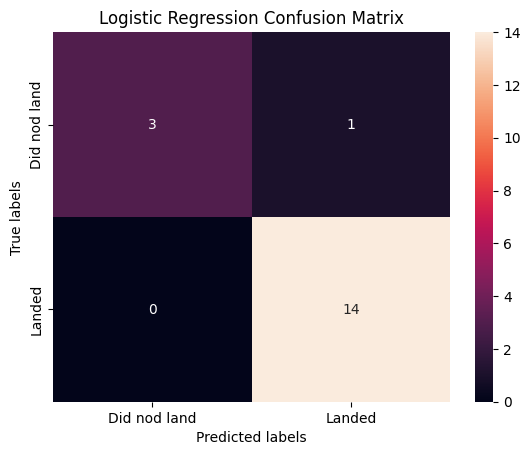

In [53]:
y_predicted = logreg_cv.predict(X_test)
plot_confusion_matrix(y_test, y_predicted, 'Logistic Regression')

In [35]:
# GridSearchCV for DecisionTreeClassifier
tree = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree_cv = GridSearchCV(tree, params, cv=10)
tree_cv.fit(X_train, y_train)

print('Decision Tree Best Parameters: ', tree_cv.best_params_)
print('Accuracy Score: ', tree_cv.best_estimator_.score(X_test, y_test))

Decision Tree Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy Score:  0.7777777777777778


c:\Users\agbad\coursera\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\agbad\coursera\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agbad\coursera\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\agbad\coursera\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\agbad\coursera\Lib\site-packages

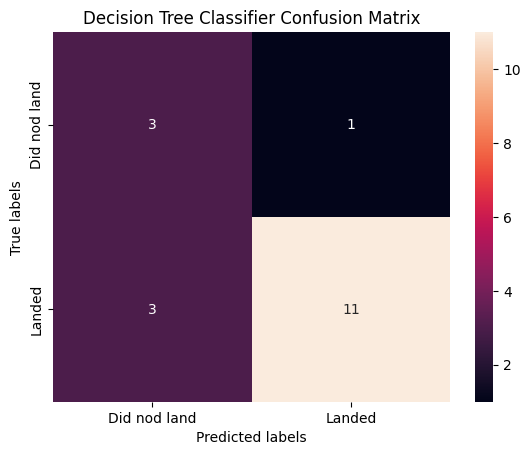

In [44]:
y_predicted = tree_cv.predict(X_test)
plot_confusion_matrix(y_test, y_predicted, 'Decision Tree Classifier')

In [38]:
# GridSearchCV with SVC
params = {
    'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
}

svm = SVC()
svm_cv = GridSearchCV(svm, params, cv=10)
svm_cv.fit(X_train, y_train)

print('Support Vector Classifier Best Parameters: ', svm_cv.best_params_)
print('Accuracy Score: ', svm_cv.best_estimator_.score(X_test, y_test))

Support Vector Classifier Best Parameters:  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
Accuracy Score:  0.8888888888888888


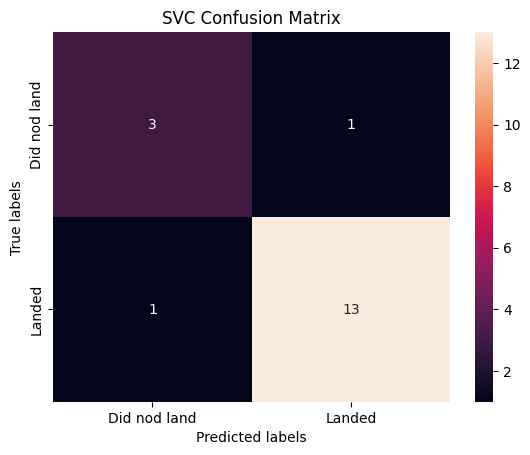

In [45]:
y_predicted = svm_cv.predict(X_test)
plot_confusion_matrix(y_test, y_predicted, 'SVC')

In [46]:
params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params, cv=10)
knn_cv.fit(X_train, y_train)

print('KNN Best Parameters: ', knn_cv.best_params_)
print('Accuracy Score: ', knn_cv.best_estimator_.score(X_test, y_test))

KNN Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy Score:  0.9444444444444444


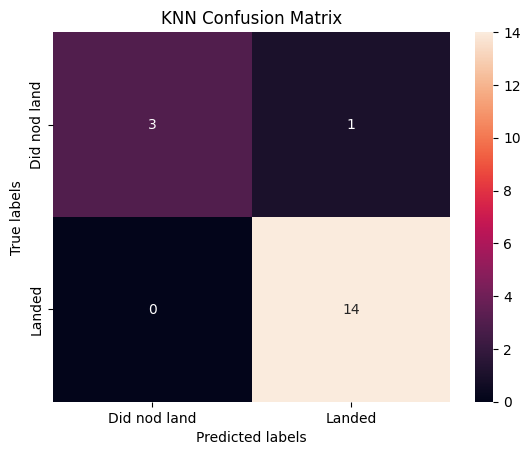

In [47]:
y_predicted = knn_cv.predict(X_test)
plot_confusion_matrix(y_test, y_predicted, 'KNN')

### Comparative Analysis of Models and Confusion Matrices

In this notebook, we evaluated four different classification models for predicting the outcome of SpaceX Falcon 9 first stage landings: **Logistic Regression**, **Decision Tree Classifier**, **Support Vector Classifier (SVC)**, and **K-Nearest Neighbors (KNN)**. Below is a comparative analysis of their performance and confusion matrices:

1. Logistic Regression
- **Performance:** Logistic Regression is a linear model and often serves as a strong baseline for binary classification tasks. In our results, it achieved a great accuracy of about 94.4%, indicating that the features have some linear separability.
- **Confusion Matrix:** The confusion matrix for Logistic Regression showed a balanced performance, with a good number of true positives (14) and true negatives (3).

2. Decision Tree Classifier
- **Performance:** The Decision Tree classifier can capture non-linear relationships and interactions between features.However, it performed less better than the logistic regression with a score of about 77.7%.
- **Confusion Matrix:** The confusion matrix for the Decision Tree showed fewer true positives and more false negatives than the logistic regression

3. Support Vector Classifier (SVC)
- **Performance:** SVC, especially with non-linear kernels (like RBF or polynomial), is powerful for complex datasets. After hyperparameter tuning with GridSearchCV, SVC achieved a relatively high score of 88.8%.
- **Confusion Matrix:** The confusion matrix for SVC showed strong performance, with high true positive and true negative rates. The number of misclassifications was minimized, suggesting that SVC was able to find a good decision boundary for the data.

4. K-Nearest Neighbors (KNN)
- **Performance:** KNN is a non-parametric method that can perform well with well-separated classes but may struggle with high-dimensional or imbalanced data. In our case, KNN performed very well with a score of 94.4%.
- **Confusion Matrix:** The confusion matrix for KNN showed the same performance as the logistic regression model.

#### **Overall Comparison**
- **Best Model:** Based on accuracy and confusion matrix analysis, **Logistic Regression** and **KNN**(with optimal hyperparameters) provided the best overall performance, with the fewest misclassifications.
- **Interpretability:** Logistic Regression and Decision Tree are more interpretable than SVC and KNN, which is important for understanding feature importance.
- **Overfitting:** Decision Trees and KNN can overfit if not properly tuned, while Logistic Regression and SVC (with regularization) are more robust.
- **Confusion Matrices:** All models showed some trade-off between false positives and false negatives, but SVC and Decision Tree generally had more balanced and favorable confusion matrices.

**Conclusion:**  
For this classification task, Logistic Regression and KNN outperformed SVC and Decision Tree classifiers in terms of accuracy and confusion matrix results. However, model selection should also consider interpretability and computational efficiency, depending on the application context.
